In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
dataset = pd.read_csv('./creditcard.csv')

In [3]:
# Scaling the amount column
dataset['Amount'] = StandardScaler().fit_transform(dataset[['Amount']])

In [4]:
# Preprocessing the dataset
dataset['hour'] = dataset['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
X = pd.concat([dataset.loc[:,'V1':'Amount'],dataset.loc[:,'Time']],axis=1)
y = dataset['Class']

In [5]:
# Over-sampling with imblearn library
smote = SMOTE(random_state=42)
os_X, os_y = smote.fit_sample(X, y)
oversampled_X = pd.DataFrame(data=os_X)
oversampled_y= pd.DataFrame(data=os_y)

In [6]:
# Under-sampling with imblearn library
neigh_cleaning = RandomUnderSampler(random_state=42)
us_X, us_y = neigh_cleaning.fit_sample(X, y)
undersampled_X = pd.DataFrame(data=us_X)
undersampled_y= pd.DataFrame(data=us_y)

In [7]:
# Creating Logistic Regression models
lr_model = LogisticRegression()
us_lr_model = LogisticRegression()
os_lr_model = LogisticRegression()

In [8]:
# Validating the Logistic Regression model with K-Fold Cross Validation method on the Original Dataset
scores_original = cross_val_score(lr_model, X, y, cv=10, n_jobs=-1, verbose=1)
print("10-Fold Cross Validation Scores for Original Dataset: \n"+ str(scores_original))

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.7s remaining:    8.4s


10-Fold Cross Validation Scores for Original Dataset: 
[ 0.98483253  0.99957868  0.99982444  0.99950844  0.99929778  0.99908708
  0.99968399  0.99870084  0.99834972  0.99880618]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.2s finished


In [9]:
# Validating the Logistic Regression model with K-Fold Cross Validation method on the Undersampled Dataset
scores_us = cross_val_score(us_lr_model, undersampled_X, undersampled_y.values.ravel(), cv=10, n_jobs=-1, verbose=1)
print("10-Fold Cross Validation Scores for Undersampled Dataset: \n"+ str(scores_us))

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.1s remaining:    4.0s


10-Fold Cross Validation Scores for Undersampled Dataset: 
[ 0.97        0.99        0.97959184  0.90816327  0.89795918  0.92857143
  0.96938776  0.8877551   0.89795918  0.85714286]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.9s finished


In [10]:
# Validating the Logistic Regression model with K-Fold Cross Validation method on the Oversampled Dataset
scores_os = cross_val_score(os_lr_model, oversampled_X, oversampled_y.values.ravel(), cv=10, n_jobs=-1, verbose=1)
print("10-Fold Cross Validation Scores for Oversampled Dataset: \n"+ str(scores_os))

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   23.2s remaining:   15.4s


10-Fold Cross Validation Scores for Oversampled Dataset: 
[ 0.91949212  0.9559827   0.95941193  0.95935917  0.9587085   0.96217157
  0.968362    0.9687489   0.9684851   0.97451725]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.5s finished


In [11]:
# Splitting the original, under-sampled and over-sampled datasets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
os_X_train, os_X_test, os_y_train, os_y_test = train_test_split(oversampled_X, oversampled_y, test_size = 0.3, random_state=42)
us_X_train, us_X_test, us_y_train, us_y_test = train_test_split(undersampled_X, undersampled_y, test_size = 0.3, random_state=42)

In [12]:
# Fit the model with the Original Dataset
lr_model.fit(X_train, y_train)

# Predict with model
y_pred = lr_model.predict(X_test)

In [13]:
print('-------------Classification Report for Original Dataset-------------\n')
print(classification_report(y_test,y_pred))

-------------Classification Report for Original Dataset-------------

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.71      0.65      0.68       136

avg / total       1.00      1.00      1.00     85443



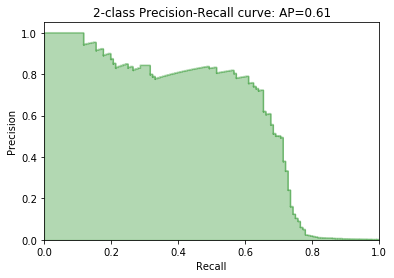

In [14]:
# Plotting 2-class precision-recall curve with AP
y_score = lr_model.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)

average_precision = average_precision_score(y_test, y_score)

plt.step(recall, precision, color='g', alpha=0.3, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [19]:
# Fit the model with the Undersampled Dataset
us_lr_model.fit(us_X_train, us_y_train.values.ravel())

# Predict with model
us_y_pred = us_lr_model.predict(us_X_test)

In [20]:
print('-------------Classification Report for Undersampled Dataset-------------\n')
print(classification_report(us_y_test,us_y_pred))

-------------Classification Report for Undersampled Dataset-------------

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       150
          1       0.96      0.90      0.93       146

avg / total       0.93      0.93      0.93       296



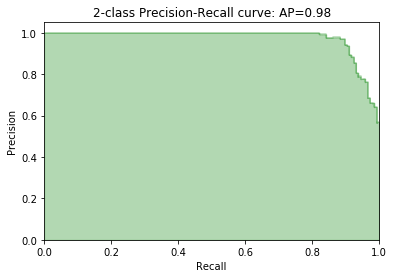

In [21]:
# Plotting 2-class precision-recall curve with AP
us_y_score = us_lr_model.decision_function(us_X_test)

us_precision, us_recall, _ = precision_recall_curve(us_y_test, us_y_score)

us_average_precision = average_precision_score(us_y_test, us_y_score)

plt.step(us_recall, us_precision, color='g', alpha=0.3, where='post')
plt.fill_between(us_recall, us_precision, step='post', alpha=0.3, color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(us_average_precision))
plt.show()

In [22]:
# Fit the model with the Oversampled Dataset
os_lr_model.fit(os_X_train, os_y_train.values.ravel())

# Predict with model
os_y_pred = os_lr_model.predict(os_X_test)

In [23]:
print('-------------Classification Report for Oversampled Dataset-------------\n')
print(classification_report(os_y_test,os_y_pred))

-------------Classification Report for Oversampled Dataset-------------

             precision    recall  f1-score   support

          0       0.93      0.99      0.96     85149
          1       0.99      0.93      0.96     85440

avg / total       0.96      0.96      0.96    170589



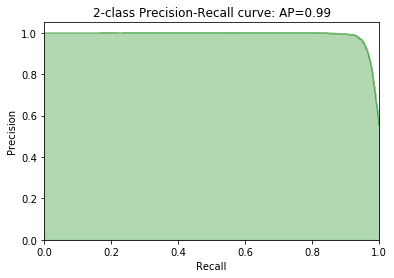

In [24]:
# Plotting 2-class precision-recall curve with AP
os_y_score = os_lr_model.decision_function(os_X_test)

os_precision, os_recall, _ = precision_recall_curve(os_y_test, os_y_score)

os_average_precision = average_precision_score(os_y_test, os_y_score)

plt.step(os_recall, os_precision, color='g', alpha=0.3, where='post')
plt.fill_between(os_recall, os_precision, step='post', alpha=0.3, color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(os_average_precision))
plt.show()